# Apple Leave Disease Detection using DenseNet-201

This stage of the task aims to visualize apple leaves dataset using

In [2]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


## Load and Prepare the Dataset

In [4]:
import glob
import cv2
import numpy as np

In [5]:
# Initialize lists to hold the images and labels
Apple_Apple_scab = []
Apple_Black_rot = []
Apple_Cedar_apple_rust = []
Apple_healthy = []

# Load apple scab images
for f in glob.iglob("C:/Users/ceagbaraji/Documents/plant_apple/Apple___Apple_scab/*.JPG"):
    img = cv2.imread(f)
    img = cv2.resize(img, (224, 224))
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    Apple_Apple_scab.append(img)

# Load apple black rot images
for f in glob.iglob("C:/Users/ceagbaraji/Documents/plant_apple/Apple___Black_rot/*.JPG"):
    img = cv2.imread(f)
    img = cv2.resize(img, (224, 224))
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    Apple_Black_rot.append(img)

# Load cedar apple rust images
for f in glob.iglob("C:/Users/ceagbaraji/Documents/plant_apple/Apple___Cedar_apple_rust/*.JPG"):
    img = cv2.imread(f)
    img = cv2.resize(img, (224, 224))
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    Apple_Cedar_apple_rust.append(img)

# Load apple healthy images
for f in glob.iglob("C:/Users/ceagbaraji/Documents/plant_apple/Apple___healthy/*.JPG"):
    img = cv2.imread(f)
    img = cv2.resize(img, (224, 224))
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    Apple_healthy.append(img)

In [6]:
# Convert lists to numpy arrays
Apple_Apple_scab = np.array(Apple_Apple_scab)
Apple_Black_rot = np.array(Apple_Black_rot)
Apple_Cedar_apple_rust = np.array(Apple_Cedar_apple_rust)
Apple_healthy = np.array(Apple_healthy)
d_s = np.concatenate((Apple_Apple_scab, Apple_Black_rot, Apple_Cedar_apple_rust, Apple_healthy))

In [7]:
Apple_Apple_scab.shape

(630, 224, 224, 3)

In [8]:
Apple_Black_rot.shape

(621, 224, 224, 3)

In [9]:
Apple_Cedar_apple_rust.shape

(275, 224, 224, 3)

In [10]:
Apple_healthy.shape

(989, 224, 224, 3)

In [11]:
d_s.shape

(2515, 224, 224, 3)

In [12]:
np.random.choice(10, 5, replace=False)

array([9, 4, 0, 3, 7])

## Visualize the Dataset

In [13]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [14]:
def plot_random(Apple_Apple_scab, Apple_Black_rot, Apple_Cedar_apple_rust, Apple_healthy, num=5):
    Apple_Apple_scab_imgs = Apple_Apple_scab[np.random.choice(Apple_Apple_scab.shape[0], num, replace=False)]
    Apple_Black_rot_imgs = Apple_Black_rot[np.random.choice(Apple_Black_rot.shape[0], num, replace=False)]
    Apple_Cedar_apple_rust_imgs = Apple_Cedar_apple_rust[np.random.choice(Apple_Cedar_apple_rust.shape[0], num, replace=False)]
    Apple_healthy_imgs = Apple_healthy[np.random.choice(Apple_healthy.shape[0], num, replace=False)]

    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('Apple Apple scab')
        plt.imshow(Apple_Apple_scab_imgs[i])

    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('Apple Black rot')
        plt.imshow(Apple_Black_rot_imgs[i])

    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('Apple Cedar apple rust')
        plt.imshow(Apple_Cedar_apple_rust_imgs[i])

    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('Apple healthy')
        plt.imshow(Apple_healthy_imgs[i])

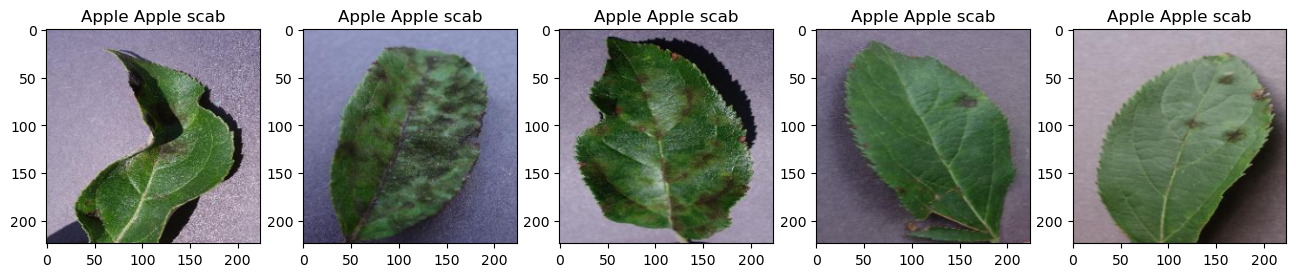

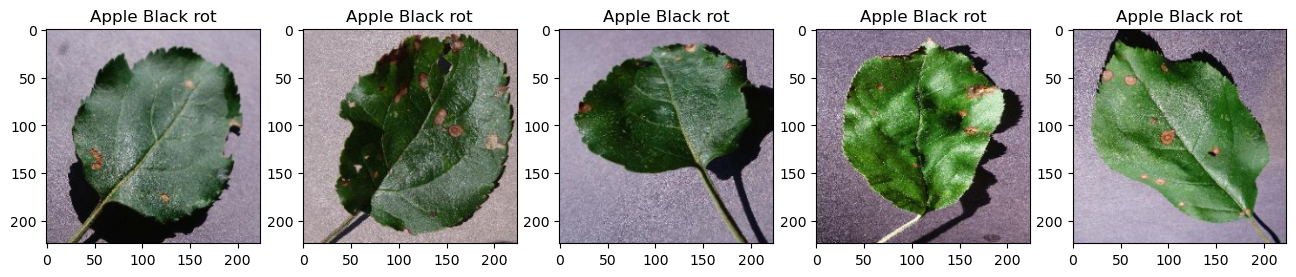

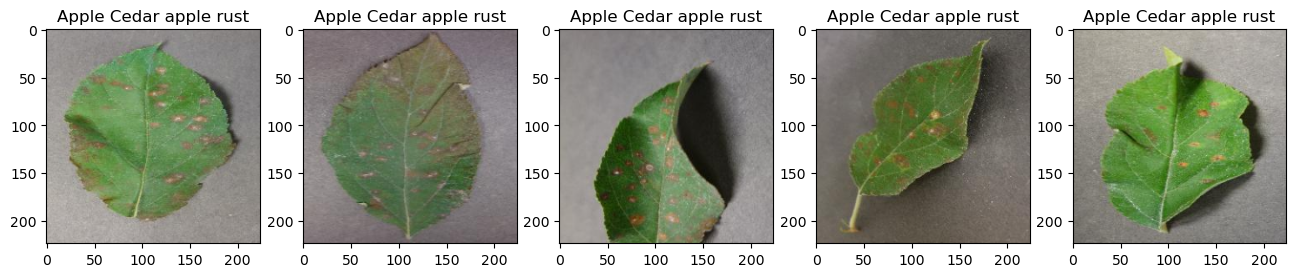

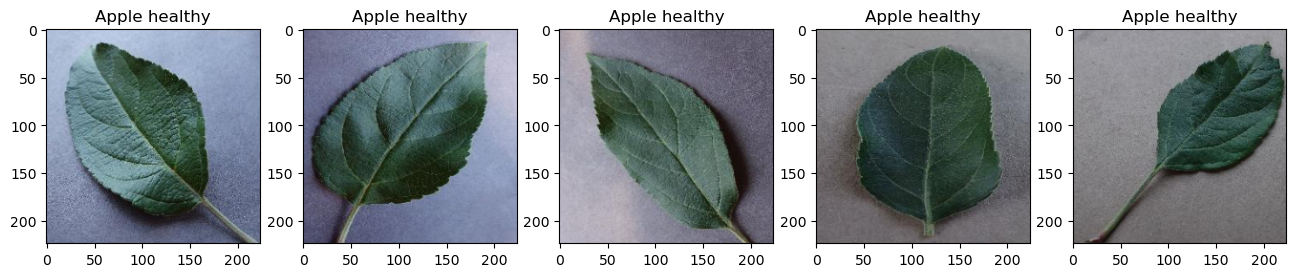

In [15]:
plot_random(Apple_Apple_scab, Apple_Black_rot, Apple_Cedar_apple_rust, Apple_healthy, num=5)

In [16]:
# Prepare labels
Apple_Apple_scab_labels = np.full(len(Apple_Apple_scab), 0)
Apple_Black_rot_labels = np.full(len(Apple_Black_rot), 1)
Apple_Cedar_apple_rust_labels = np.full(len(Apple_Cedar_apple_rust), 2)
Apple_healthy_labels = np.full(len(Apple_healthy), 3)

In [17]:
# Concatenate data and labels
images = np.concatenate((Apple_Apple_scab, Apple_Black_rot, Apple_Cedar_apple_rust, Apple_healthy), axis=0)
labels = np.concatenate((Apple_Apple_scab_labels, Apple_Black_rot_labels, Apple_Cedar_apple_rust_labels, Apple_healthy_labels), axis=0)

In [18]:
# Normalize the data to [0, 1] range
images = images / 255.0

# Split the Dataset

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Split the dataset into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Design DenseNet-201 Model

In [21]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

In [22]:
# Load the DenseNet-201 architecture with pre-trained ImageNet weights
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model's layers to prevent training them initially
base_model.trainable = False

# Add custom layers for multi-class classification
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer
x = Dense(128, activation='relu')(x)  # Fully connected layer
x = Dropout(0.5)(x)  # Dropout layer for regularization
output = Dense(4, activation='softmax')(x)  # Output layer with 4 neurons for multi-class classification

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()

74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d                │ (None, 230, 230, 3)       │               0 │ input_layer[0][0]          │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,408 │ zero_padding2d[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_1              │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1 (MaxPooling2D)          │ (None, 56, 56, 64)        │               0 │ zero_padding2d_1[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_bn             │ (None, 56, 56, 64)        │             256 │ pool1[0][0]                │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_0_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 128)       │           8,192 │ conv2_block1_0_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 128)       │             512 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 128)       │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 32)        │          36,864 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_concat           │ (None, 56, 56, 96)        │               0 │ pool1[0][0],               │
│ (Concatenate)                 │                           │               

 Total params: 18,568,388 (70.83 MB)

 Trainable params: 246,404 (962.52 KB)

 Non-trainable params: 18,321,984 (69.89 MB)

# Train the DenseNet-201 Model

In [23]:
# Train the model
history = model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels), batch_size=32)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 238s 3s/step - accuracy: 0.4557 - loss: 1.2093 - val_accuracy: 0.8469 - val_loss: 0.6716
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.7699 - loss: 0.7065 - val_accuracy: 0.9284 - val_loss: 0.4421
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 200s 3s/step - accuracy: 0.8642 - loss: 0.4852 - val_accuracy: 0.9344 - val_loss: 0.3270
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.9119 - loss: 0.3652 - val_accuracy: 0.9483 - val_loss: 0.2560
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.9063 - loss: 0.3135 - val_accuracy: 0.9602 - val_loss: 0.2050
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 202s 3s/step - accuracy: 0.9225 - loss: 0.2654 - val_accuracy: 0.9602 - val_loss: 0.1771
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.9460 - loss: 0.2278 - val_accuracy: 0.9662 - val_loss: 0.1533
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 201s 3s/step - accuracy: 0.9455 - loss: 0.1995 - val_accuracy: 0.9662 - v

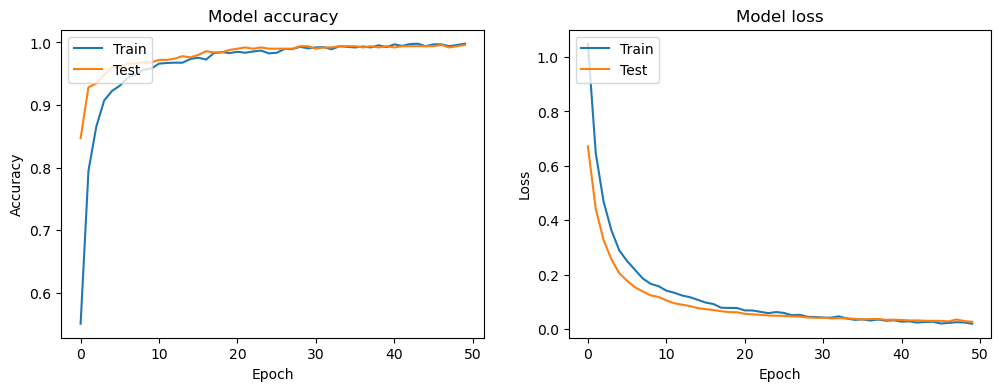

In [24]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Evaluate the Model

In [25]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

16/16 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9989 - loss: 0.0211
Test Loss: 0.0264
Test Accuracy: 0.9960


In [26]:
# Predict the labels on the test set
pred_labels = np.argmax(model.predict(test_images), axis=1)


16/16 ━━━━━━━━━━━━━━━━━━━━ 56s 3s/step


In [27]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [28]:
# Calculate the confusion matrix
cm = confusion_matrix(test_labels, pred_labels)

# Define the class names
class_names = ['Apple_scab', 'Black_rot', 'Cedar_apple_rust', 'healthy']


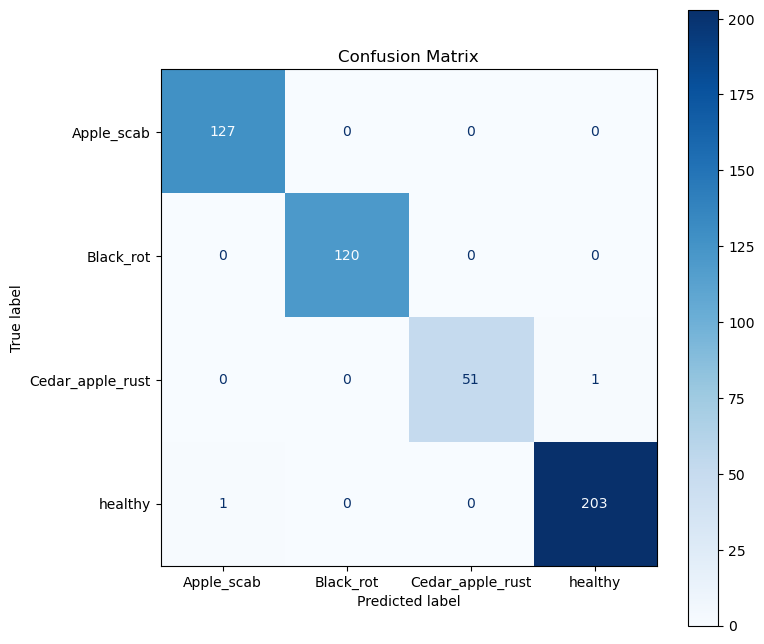

In [29]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap='Blues', values_format='d', ax=ax, colorbar=True)
plt.grid(False)  # Remove grid lines
plt.title("Confusion Matrix")
plt.show()

In [30]:
# Print a classification report
print(classification_report(test_labels, pred_labels, target_names=class_names))

                  precision    recall  f1-score   support

      Apple_scab       0.99      1.00      1.00       127
       Black_rot       1.00      1.00      1.00       120
Cedar_apple_rust       1.00      0.98      0.99        52
         healthy       1.00      1.00      1.00       204

        accuracy                           1.00       503
       macro avg       1.00      0.99      1.00       503
    weighted avg       1.00      1.00      1.00       503

